Изображение сохранено: C:\Users\arsen\Neuro\otchet\I-45_r.png


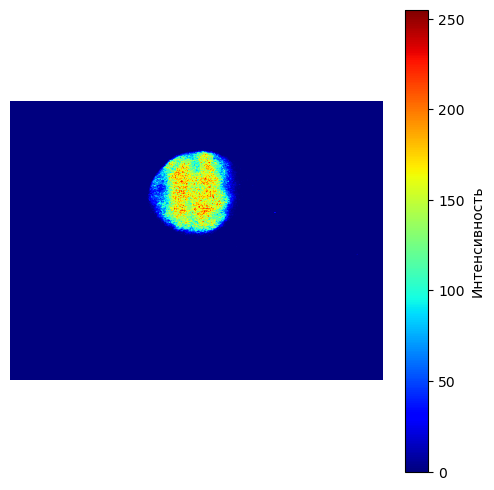

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_image_from_txt(file_path, output_dir=None):
    """
    Визуализирует изображение из текстового файла, где значения представляют интенсивность пикселей.

    Args:
        file_path (str): Путь к текстовому файлу.
        output_dir (str, optional): Папка для сохранения изображения. Если None, изображение не сохраняется.

    Returns:
        None
    """
    try:
        # Считываем данные из текстового файла
        data = np.loadtxt(file_path, delimiter=None)  # Автоматически определяет разделитель

        # Проверяем, что значения в пределах [0, 255]
        if np.any(data < 0) or np.any(data > 255):
            raise ValueError("Интенсивности пикселей должны быть в диапазоне [0, 255].")

        # Визуализация изображения
        plt.figure(figsize=(6, 6))
        plt.imshow(data, cmap='jet', vmin=0, vmax=255)
        plt.colorbar(label='Интенсивность')
        #plt.title("Визуализация изображения из TXT")
        plt.axis('off')

        # Сохранение изображения, если указан путь
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            output_path = os.path.join(output_dir, os.path.basename(file_path).replace('.txt', '.png'))
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Изображение сохранено: {output_path}")

        # Показать изображение
        plt.show()

    except Exception as e:
        print(f"Ошибка при обработке файла: {e}")

# Пример использования
file_path = r"C:\Users\arsen\Neuro\otchet\I-45_r.txt"  # Замените на путь к вашему текстовому файлу
output_dir = r"C:\Users\arsen\Neuro\otchet"  # Папка для сохранения изображений
visualize_image_from_txt(file_path, output_dir)

In [ ]:
import os
import numpy as np
from PIL import Image
from scipy.ndimage import center_of_mass

# Параметры
threshold = 100  # Порог по яркости для обнаружения пятна
output_size = 450  # Размер вырезаемой области (250x250)

# Пути
file_path = r"C:\Users\arsen\Neuro\otchet\hp_blue.txt"  # Укажите путь к вашему txt-файлу
output_dir_cropped = r"C:\Users\arsen\Neuro\otchet"  # Путь для сохранения
os.makedirs(output_dir_cropped, exist_ok=True)  # Создаем папку для сохранения, если её нет

# Загружаем яркость из файла
brightness_matrix = np.loadtxt(file_path)

# Проверяем, нужно ли нормализовать
if brightness_matrix.max() < 255:
    brightness_matrix = (brightness_matrix - brightness_matrix.min()) / \
                        (brightness_matrix.max() - brightness_matrix.min()) * 255
brightness_matrix = brightness_matrix.astype(np.uint8)

# Применяем порог: оставляем только пиксели выше порога
mask = brightness_matrix > threshold

# Проверяем, есть ли яркое пятно на изображении
if np.any(mask):
    # Вычисляем центр масс ярких пикселей
    center_y, center_x = center_of_mass(mask)
    center_y, center_x = int(center_y), int(center_x)  # Приводим координаты к целым числам

    # Рассчитываем координаты для вырезки 250x250
    half_size = output_size // 2
    top = max(center_y - half_size, 0)
    left = max(center_x - half_size, 0)
    bottom = min(center_y + half_size, brightness_matrix.shape[0])
    right = min(center_x + half_size, brightness_matrix.shape[1])

    # Обрезаем изображение по рассчитанным координатам
    cropped_matrix = brightness_matrix[top:bottom, left:right]

    # Если вырез меньше 250x250, дополняем его до нужного размера
    padded_matrix = np.zeros((output_size, output_size), dtype=np.uint8)
    padded_matrix[:cropped_matrix.shape[0], :cropped_matrix.shape[1]] = cropped_matrix

    # Визуализация с цветовой шкалой
    plt.figure(figsize=(6, 6))
    plt.imshow(padded_matrix, cmap='jet', vmin=0, vmax=255)  # Используем цветовую карту viridis
    plt.colorbar(label="")  # Добавляем шкалу с подписью
    plt.axis("off")

    # Сохраняем изображение
    base_name = os.path.splitext(os.path.basename(file_path))[0]
    output_path_cropped = os.path.join(output_dir_cropped, f'{base_name}_cropped_with_colorbar.png')
    plt.savefig(output_path_cropped, bbox_inches='tight')
    plt.close()

    print(f'Saved cropped image with colorbar: {output_path_cropped}')
else:
    print("No bright spot detected above the threshold.")


Saved cropped image with colorbar: C:\Users\arsen\Neuro\otchet\hp_blue_cropped_with_colorbar.png
